In [4]:
import numpy as np
import torch
import torch.optim as optim
from matplotlib import pyplot as plt
torch.set_printoptions(edgeitems=2, linewidth=75)


In [5]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
#Normalizing (value between -1 - 1)
t_un = 0.01 * t_u

In [6]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [7]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


In [8]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [9]:
#Non-Linear Model with SGD
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)

Epoch 1, Loss 165.449524
Epoch 500, Loss 26.266186
Epoch 1000, Loss 12.949670
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289264
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713


tensor([ 24.3412,  27.9050, -10.3017], requires_grad=True)

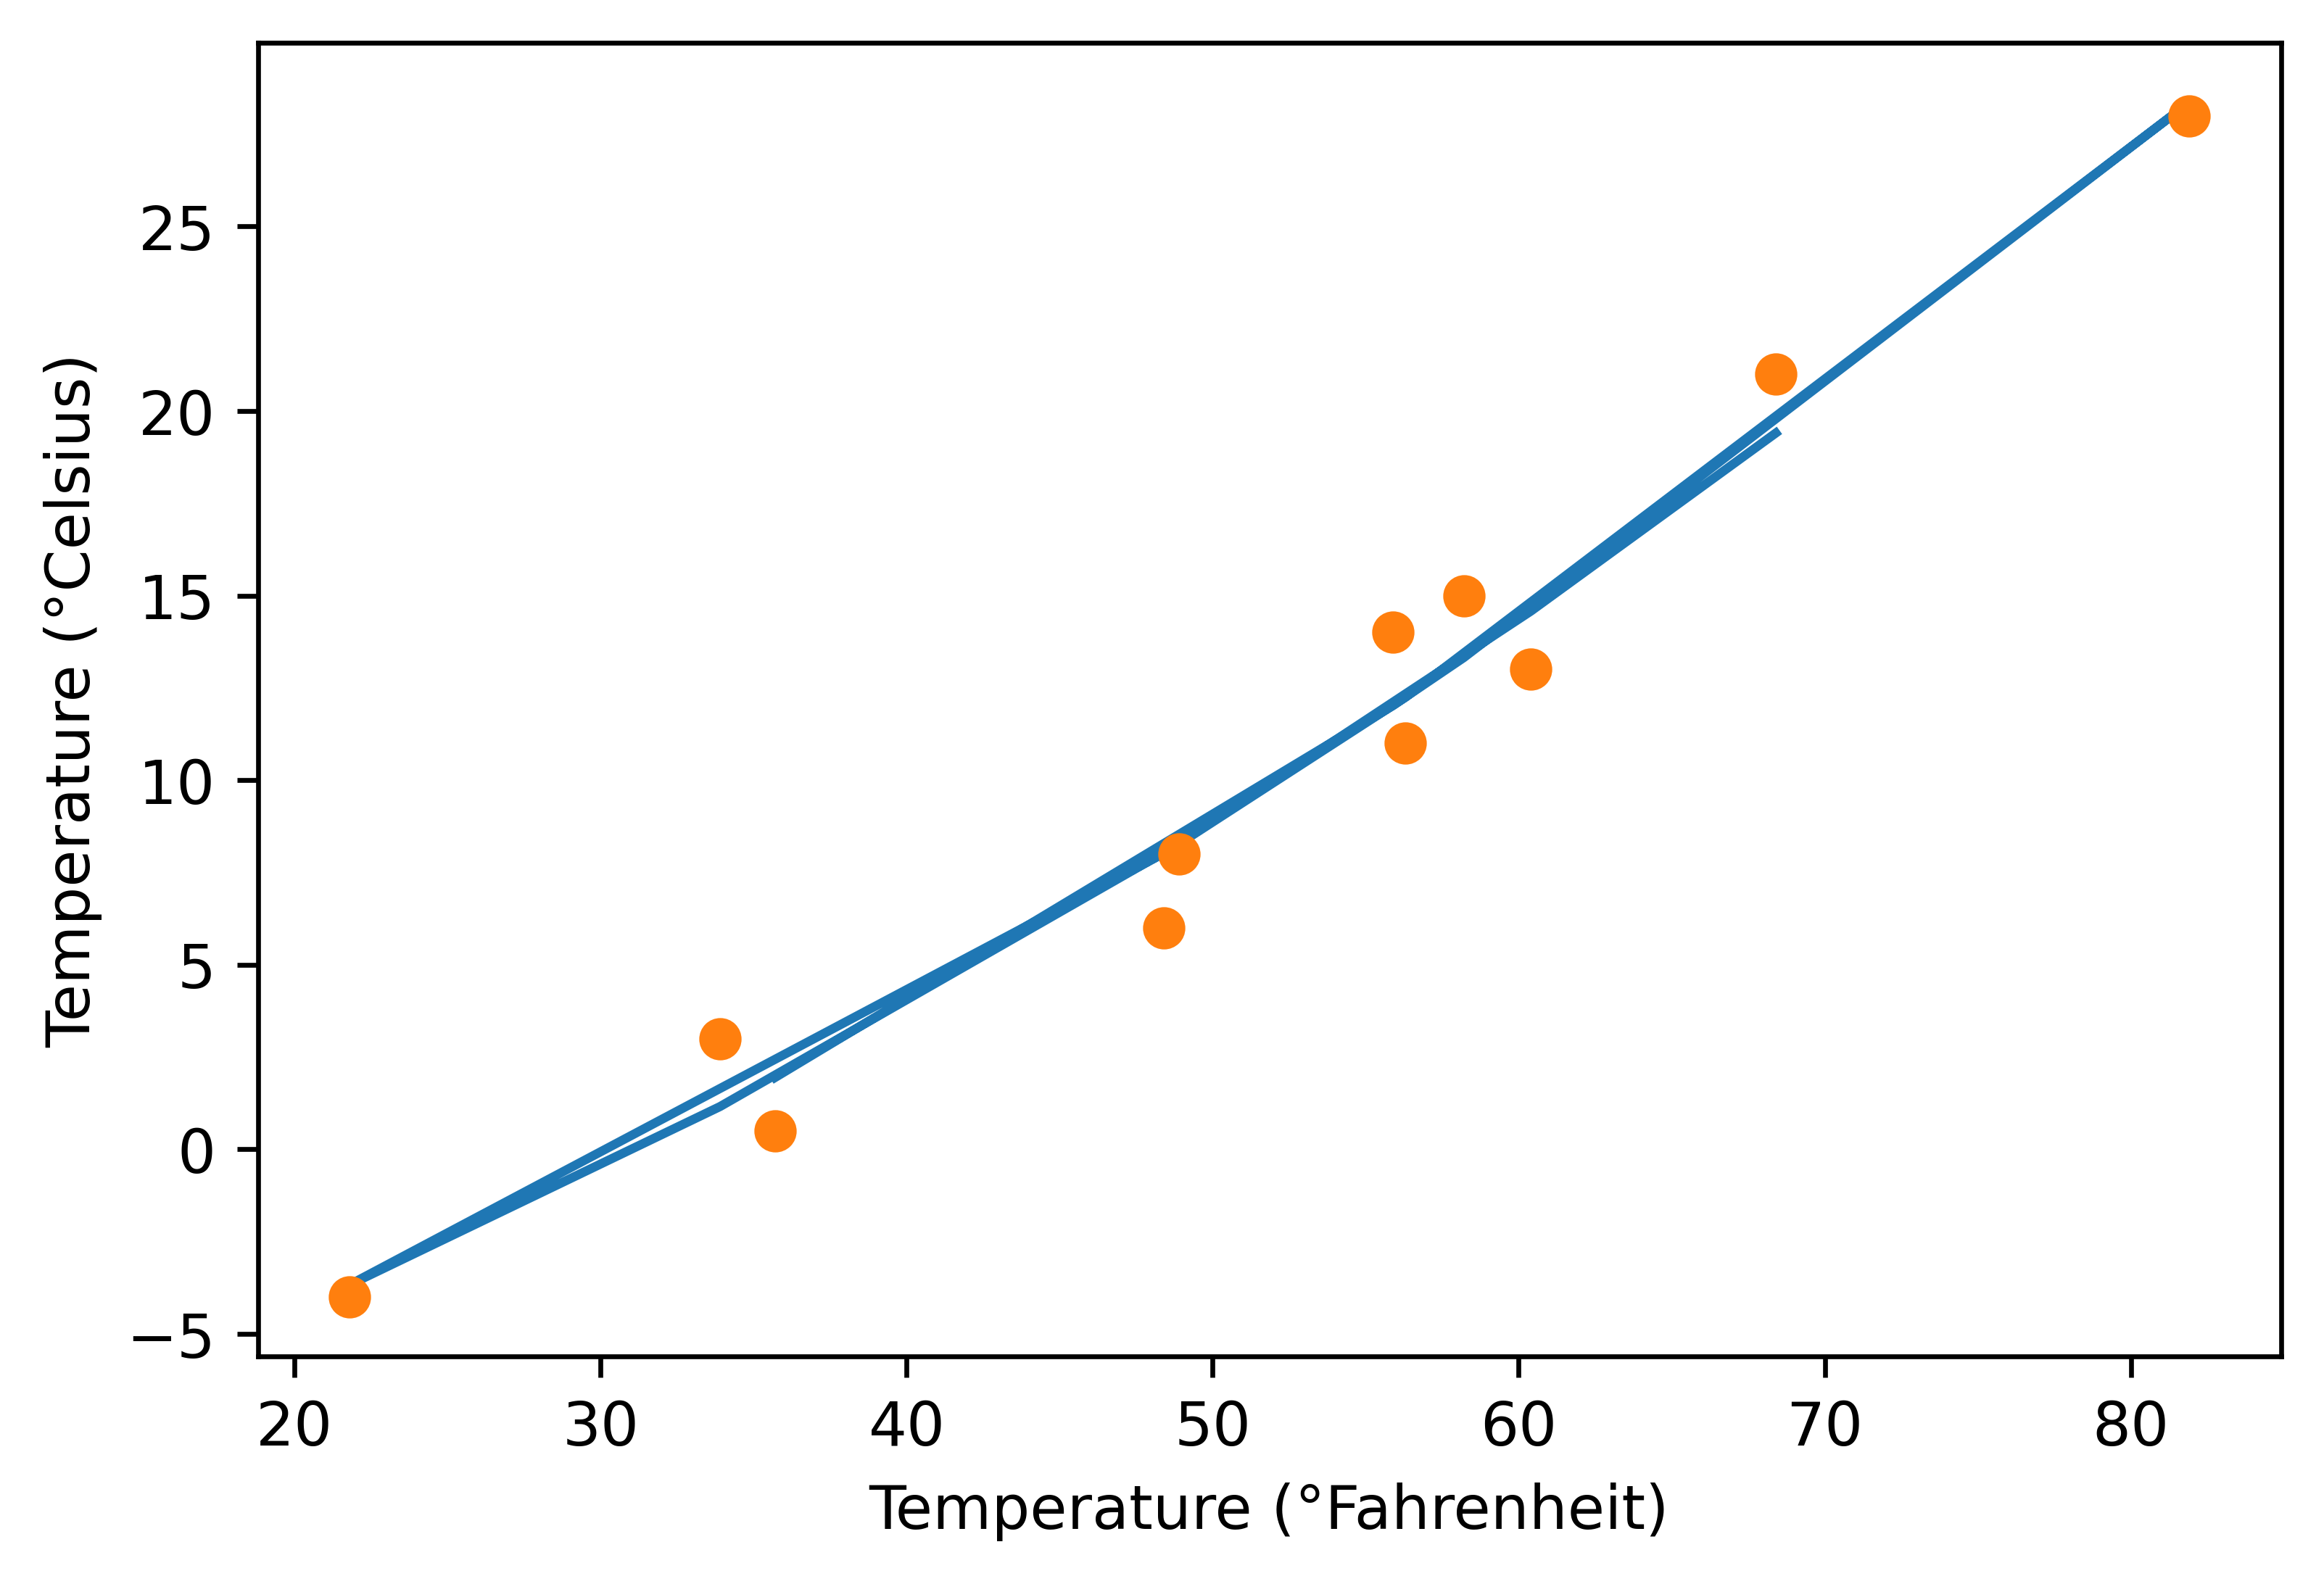

In [10]:
t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [12]:
#Non-Linear Model with Adam
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)

Epoch 1, Loss 165.449524
Epoch 500, Loss 57.949387
Epoch 1000, Loss 40.551369
Epoch 1500, Loss 33.974377
Epoch 2000, Loss 27.274971
Epoch 2500, Loss 20.752821
Epoch 3000, Loss 14.940603
Epoch 3500, Loss 10.199283
Epoch 4000, Loss 6.687762
Epoch 4500, Loss 4.367294
Epoch 5000, Loss 3.038020


tensor([19.8351, 27.2414, -7.6692], requires_grad=True)